In [66]:
import pickle
import os
import numpy as np

path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0/test_2/"
name = "0_186000_196000_49P0.pkl"
filepath = os.path.join(path, name)
with open(filepath, 'rb') as f:
    data = pickle.load(f, encoding="latin1")

In [68]:
data.keys()

dict_keys(['shapes', 'idx', 'ref_paths', 'graph', 'has_preds', 'filename', 'gt_preds', 'ctrs', 'theta', 'gt_hist', 'rot', 'feats', 'orig', 'stat_timestamp', 'ego_id', 'prediction'])

In [71]:
print(data['graph'].keys())
print(data['stat_timestamp'])
print(data['ego_id'])
print(data['prediction'].shape)


dict_keys(['pre', 'lane_idcs', 'left_pairs', 'suc', 'num_nodes', 'pre_pairs', 'ctrs', 'suc_pairs', 'right_pairs', 'feats'])
186000
49
(3, 6, 80, 2)


In [72]:
data['prediction']

array([[[[ 997.99146, 1002.0282 ],
         [ 998.03534, 1001.9108 ],
         [ 997.9718 , 1001.85913],
         ...,
         [1016.5706 ,  982.21497],
         [1017.3651 ,  982.1605 ],
         [1018.00037,  981.85236]],

        [[ 997.97705, 1002.0396 ],
         [ 997.97723, 1001.9763 ],
         [ 998.01685, 1001.8973 ],
         ...,
         [ 998.19257,  998.11163],
         [ 998.19995,  997.99567],
         [ 998.2028 ,  997.95496]],

        [[ 997.95447, 1002.01196],
         [ 997.915  , 1001.87714],
         [ 997.9211 , 1001.8448 ],
         ...,
         [ 997.5537 ,  994.2072 ],
         [ 997.3639 ,  994.07355],
         [ 997.4997 ,  993.97595]],

        [[ 997.98114, 1002.054  ],
         [ 997.9765 , 1001.9816 ],
         [ 997.9721 , 1001.9292 ],
         ...,
         [ 999.42456,  985.54724],
         [ 999.5069 ,  985.34015],
         [ 999.5729 ,  985.1151 ]],

        [[ 997.96106, 1002.032  ],
         [ 997.968  , 1001.98004],
         [ 997.93805, 1001

0 l: 1
1 l: 1
2 l: 1
3 l: 1
4 l: 1
5 l: 1
6 l: 1
[23.56303, 22.737522, 21.897541, 20.941935, 19.567268, 18.864756, 19.23924] [30.930641, 31.052183, 31.323866, 32.379585, 36.282276, 45.80684, 64.023994]


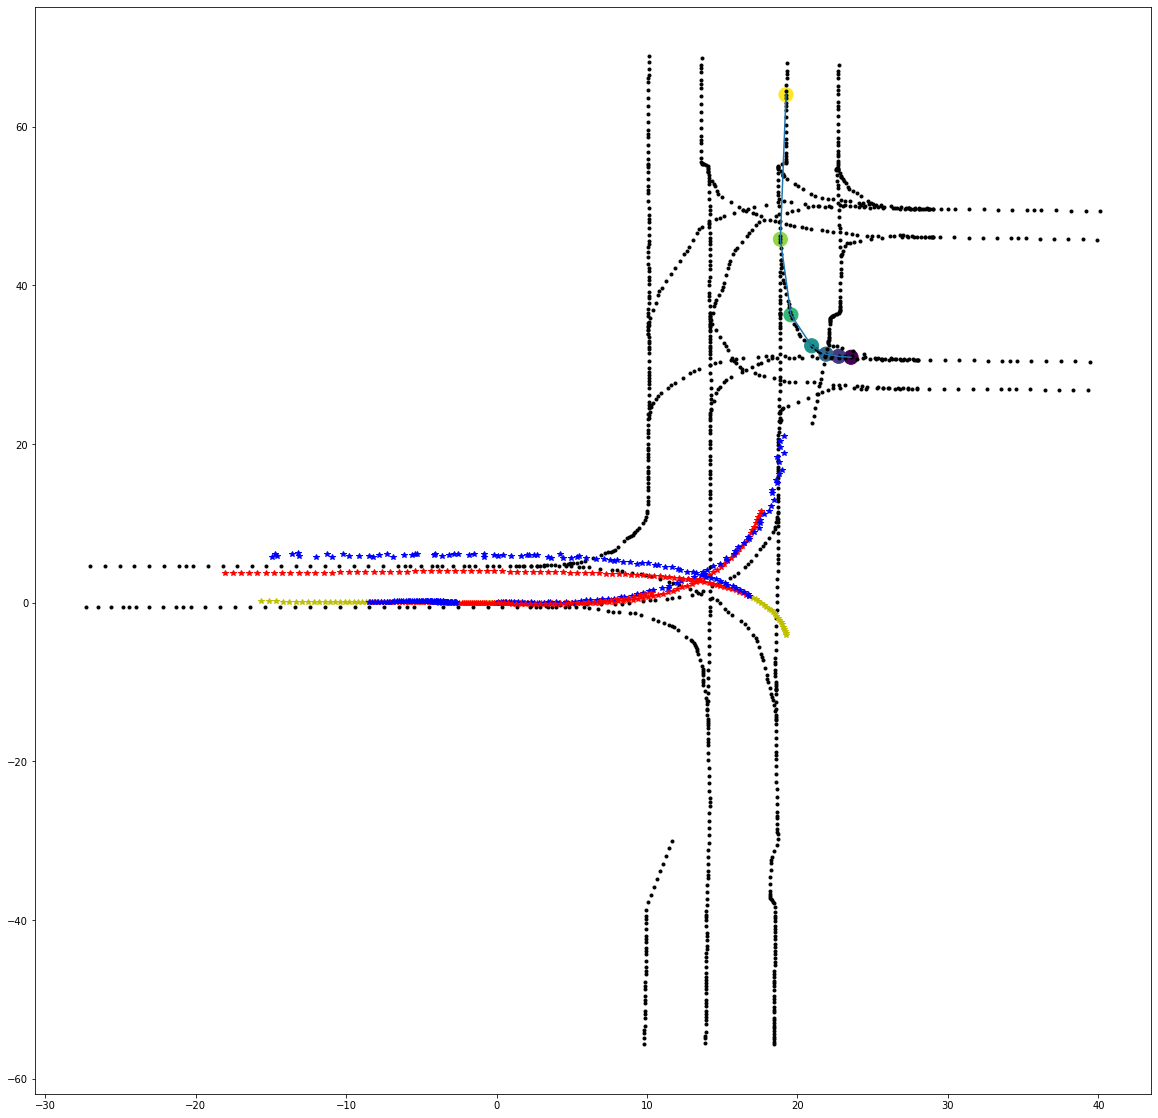

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 50
graph = data['graph']
mp = graph['ctrs']

X = []
Y = []
C = []

# cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i in range(len(graph['suc'])):
    u = graph['suc'][i]['u']
    v = graph['suc'][i]['v']
#     print('v size:', v.shape)
    
    tmp = np.where(u == pt)
    if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
        print(i, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
#             idx = tmp[0][0]

            X.append(mp[v[idx], 0])
            Y.append(mp[v[idx], 1])
            C.append(i)

            
# for side in ['left_pairs', 'right_pairs']:
#     u = graph[side]['u']
#     v = graph[side]['v']

#     tmp = np.where(u == pt)
#     if tmp and tmp[0] and tmp[0].shape[0] > 0:
#         print(side, 'l:', len(tmp[0]))
        
#         for idx in tmp[0]:
#             X.append(mp[v[idx], 0])
#             Y.append(mp[v[idx], 1])
#             C.append(1)
    
    
plt.plot(mp[:, 0], mp[:, 1], 'k.')
plt.plot(X, Y)

plt.scatter(X, Y, s = 200, c = C)
print(X, Y)

# for a in range(data['feats'].shape[0]):
#     traj = data['feats'][a]
#     plt.plot(traj[:, 0], traj[:, 1], '*')

#     for L in data['ref_paths'][a]:
#         if len(L)==0:
#             continue
#         lane = np.concatenate(L) - data['orig']
#         plt.plot(lane[:, 0], lane[:, 1])
        

for a in range(data['feats'].shape[0]):
    traj = np.matmul(data['rot'], (data['gt_preds'][a] - data['orig']).T).T
    plt.plot(traj[:, 0], traj[:, 1], 'r*')
#     plt.plot(traj[:1, 0], traj[:1, 1], 'r*')
    
    hist = np.matmul(data['rot'], (data['gt_hist'][a] - data['orig']).T).T
    plt.plot(hist[:, 0], hist[:, 1], 'y*')
    
    prediction = np.matmul(data['rot'], (data['prediction'][a][0] - data['orig']).T).T
    plt.plot(prediction[:, 0], prediction[:, 1], 'b*')
    
    for L in data['ref_paths'][a]:
        lane = np.matmul(data['rot'], (L - data['orig']).T).T
#         plt.plot(lane[:, 0], lane[:, 1], 'r')      

    # plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [25]:
print (graph['suc'][0])
print (graph['feats'].shape)

{'u': array([   0,    1,    2, ..., 1328, 1329, 1330]), 'v': array([   1,    2,    3, ..., 1329, 1330, 1331])}
(1332, 2)


In [26]:
def dfs(cur_graph_id, Lanes, lane, cur_len, S_pred):
    suc_indices = (graph['suc'][0]['u']==cur_graph_id).nonzero()
    if cur_len > S_pred or suc_indices[0].shape[0]==0:
        Lanes.append(lane[:])
        print(cur_len, S_pred)
        print(Lanes[-1])
        return 
    
    for suc_id in suc_indices:
#         print(graph['suc'][0]['v'][suc_id[0]])
#         print(suc_id)
        lane.append(graph['suc'][0]['u'][suc_id[0]])
        
        s_diff = graph['ctrs'][graph['suc'][0]['v'][suc_id[0]]] - graph['ctrs'][graph['suc'][0]['u'][suc_id[0]]]
        s = np.sqrt(np.sum(s_diff ** 2))
#         print(s.numpy())
        dfs(graph['suc'][0]['v'][suc_id[0]], Lanes, lane, cur_len + s, S_pred)
        lane.pop()

ego_graph_id = 300
Lanes = []
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
frenet_lane = graph['ctrs'][Lanes[0]]

31.76174085214734 100
[300, 301, 302, 303, 304, 305, 306, 307, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330]


In [27]:
graph['ctrs'].shape

(1332, 2)

66.66706790030003 100
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 417, 418, 419, 420, 421, 422, 423, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 756, 757, 758, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446]


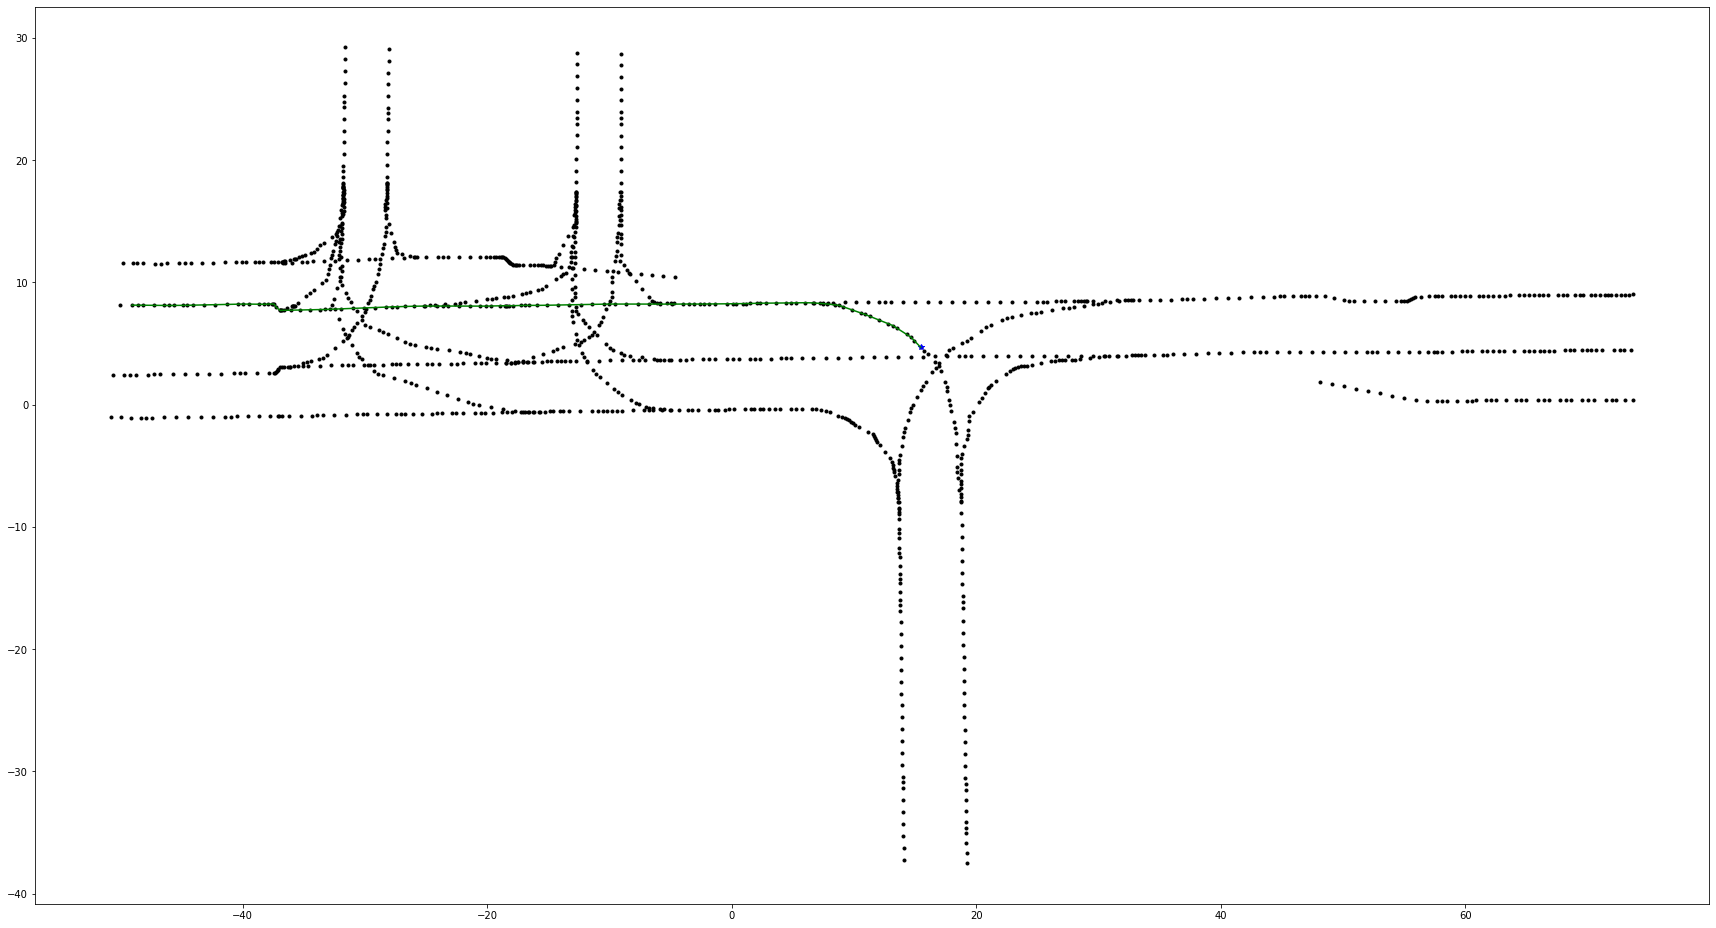

In [28]:
idx = 1

fig, ax = plt.subplots(1,1, figsize=(30,30))
ax.set_aspect('equal', adjustable='box')
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()     
# for a in range(data['gt_preds'][0].shape[0]):
#     mask = has_preds[a]
#     gt_pred = gt_preds[a][mask]

#     hist = data['feats'][idx][a]
# #     plt.plot(hist[:, 0], hist[:, 1], 'y.')
# #     traj_plot(gt_pred,  rot, orig, ax, 'r.')

#     pred_traj = results[idx][a, k, :, :]
# #     traj_plot(pred_traj, rot, orig, ax, 'b.')


ctrs = graph['ctrs']
ax.plot(ctrs[:, 0], ctrs[:, 1], 'k.')

ego_graph_id = 100
Lanes = []

ax.plot([graph['ctrs'][ego_graph_id][0]], [graph['ctrs'][ego_graph_id][1]], 'b*')
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
for Lane in Lanes:
    frenet_lane = graph['ctrs'][Lane]
    ax.plot(frenet_lane[:, 0], frenet_lane[:, 1], 'g')


plt.show()

In [29]:
n_agts = data['gt_preds'][0].shape[0]
dis = np.zeros([n_agts, n_agts])
for a in range(n_agts):
    for b in range(n_agts):
        if a == b:
            dis[a, b] = float('inf')
            continue
        sss = torch.sum((data['gt_preds'][0][a] - data['gt_preds'][0][b]) ** 2, 1)
        dis[a, b] = torch.min(sss).item()
        
print(dis)
np.argmin(dis, 0)


NameError: name 'torch' is not defined

In [ ]:
torch.argmin(sss)
dis

In [30]:
import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm
import sys
from importlib import import_module
from utils import Logger, load_pretrain, gpu, to_long,  Optimizer, StepLR

from data import InteDataset

root_path = '/home/user/Projects/LaneGCN_modified'
sys.path.insert(0, root_path)

model = import_module("lanegcn")
config, _, collate_fn, net, loss, post_process, opt = model.get_model(80)



ckpt_path = "/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/results/30.000.ckpt"
# ckpt_path = "/media/drl/datas/zyk/LaneGCN/results/lanegcn/17.000.ckpt"

if not os.path.isabs(ckpt_path):
    ckpt_path = os.path.join(config["save_dir"], ckpt_path)
ckpt = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
load_pretrain(net, ckpt["state_dict"])
net.eval()





dataset = InteDataset('/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/tmp/')
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=True,
    pin_memory=True,
)

# begin inference
preds = {}
gts = {}
cities = {}

data_list = []
for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    with torch.no_grad():
        output = net(data)
        results = [x.detach().cpu().numpy() for x in output["reg"]]


1it [00:02,  2.30s/it]


In [ ]:
print(data['graph'][0].keys())
print(data['graph'][0]['feats'].shape)
print(data['graph'][0]['left_pairs'].shape)

In [ ]:
from lanegcn import graph_gather, actor_gather

actors, actor_idcs = actor_gather(gpu(data["feats"]))
actor_ctrs = gpu(data["ctrs"])
actors = net.actor_net(actors)

# construct map features
graph = graph_gather(to_long(gpu(data["graph"])))
nodes, node_idcs, node_ctrs = net.map_net(graph)

# actor-map fusion cycle 
nodes = net.a2m(nodes, graph, actors, actor_idcs, actor_ctrs)
nodes = net.m2m(nodes, graph)
actors = net.m2a(actors, actor_idcs, actor_ctrs, nodes, node_idcs, node_ctrs)
actors = net.a2a(actors, actor_idcs, actor_ctrs)

In [ ]:
print('len', len(node_ctrs))
print('node_ctrs[0]', node_ctrs[0].cpu().numpy().shape)
print(graph['pre'][0]['u'].cpu().numpy())

all_ctrs = torch.cat(node_ctrs, 0).cpu().numpy()
print(all_ctrs.shape)
idx = np.where(u == pt)
print(graph['left'])

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 270
mp = node_ctrs[0].cpu().numpy()

X = []
Y = []
C = []

cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i in range(len(graph['suc'])):
    u = graph['suc'][i]['u'].cpu().numpy()
    v = graph['suc'][i]['v'].cpu().numpy()
#     print('v size:', v.shape)
    
    tmp = np.where(u == pt)
    if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
#         print(i, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
#             idx = tmp[0][0]

            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[i])

            
for side in ['left', 'right']:
    u = graph[side]['u'].cpu().numpy()
    v = graph[side]['v'].cpu().numpy()

    tmp = np.where(u == pt)
    if tmp and tmp[0] and tmp[0].shape[0] > 0:
        print(side, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[1])
    
    
plt.plot(mp[:, 0], mp[:, 1], 'r.')
# plt.plot(X, Y)

plt.scatter(X, Y, s = 100, c = C)
print(X, Y)

# plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[20,20])

u = graph['pre'][i]['u'].cpu().numpy()
print('u size:', u.shape)
v = graph['pre'][i]['v'].cpu().numpy()